<H1>TASK_3 DATAWIZ
<H3>      <B>By KARAN LAKHWANI

<H2>REGRESSION

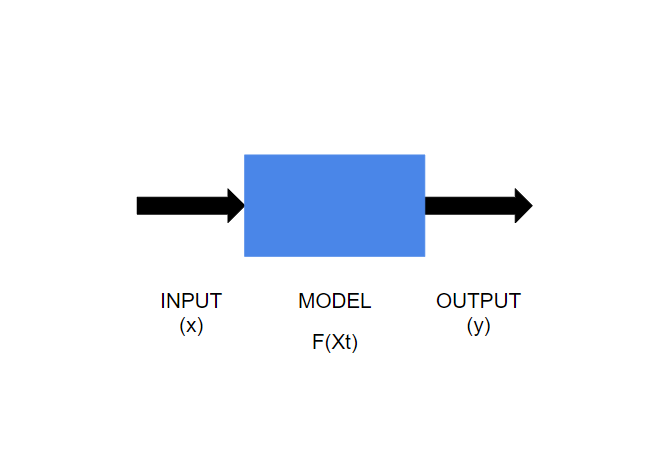

<h2>Linear Regression

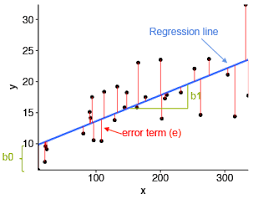

In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('datasets_1256_2242_train.csv')

In [3]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
df.head(3)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656


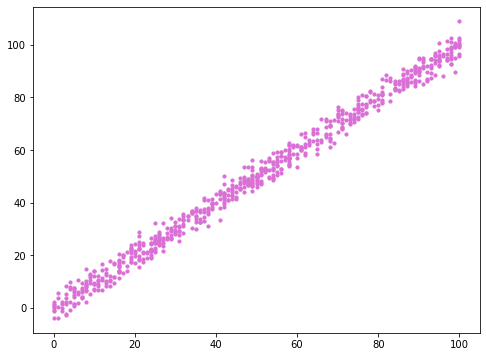

In [5]:
#scatter plotting
plt.figure(figsize = (8,6))
plt.scatter(df['x'],df['y'], color = 'orchid',s =10) 
plt.show()

In [6]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [7]:
df.corr(method ='pearson')

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


In [8]:
X = np.array(df['x']).reshape(-1,1)
y = np.array(df['y']).reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
actual = pd.Series(y_test.reshape(-1))
predicted = pd.Series(y_pred.reshape(-1))

In [13]:
new_df = pd.DataFrame({'Actual':actual,"Predicted":predicted})

In [14]:
new_df

,Actual,Predicted
0,78.202963,80.972102
1,91.850911,91.982103
2,95.584595,99.989377
3,43.273609,41.936642
4,21.812680,23.920276
...,...,...
135,10.240085,7.905729
136,72.603393,74.966647
137,36.624381,35.931187
138,43.936721,44.939370


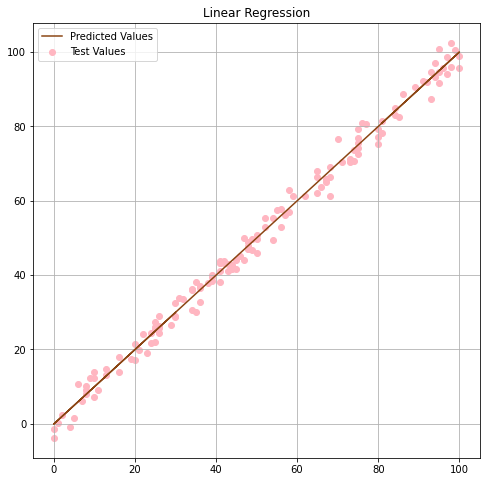

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(X_test, y_test, color = 'lightpink', label = 'Test Values')
plt.plot(X_test,y_pred, color = 'saddlebrown', linewidth = 1.5 , label = 'Predicted Values')
plt.title('Linear Regression')
plt.grid(which = 'major')
plt.legend()
plt.show()

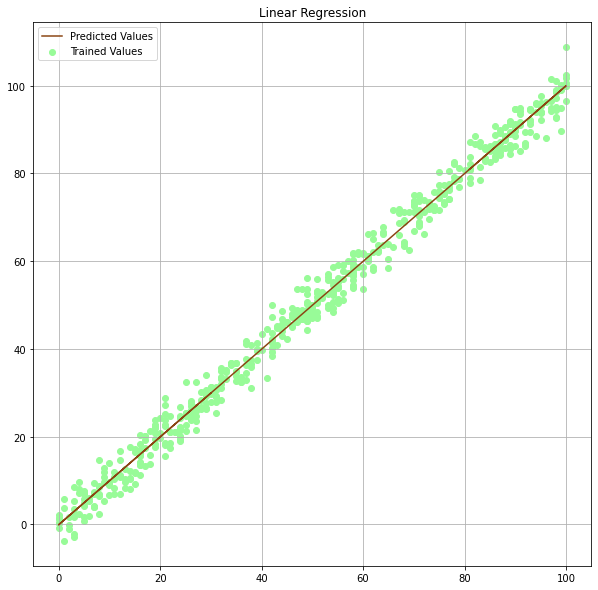

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color = 'palegreen', label = 'Trained Values')
plt.plot(X_test,y_pred, color = 'saddlebrown', linewidth = 1.5 , label = 'Predicted Values')
plt.title('Linear Regression')
plt.grid(which = 'major')
plt.legend()
plt.show()

In [17]:
metrics.mean_absolute_error(y_test, y_pred)

2.0688745899381282

In [18]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2.5166763969022186

In [19]:
 metrics.mean_squared_error(y_test, y_pred)

6.333660086724734

<h2>Polynomial Regression

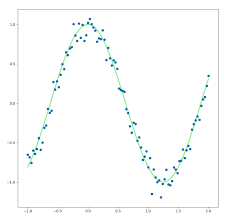

In [20]:
a = df.head(50)

<AxesSubplot:title={'center':'Scatter plot for first 10 values'}, xlabel='x', ylabel='y'>

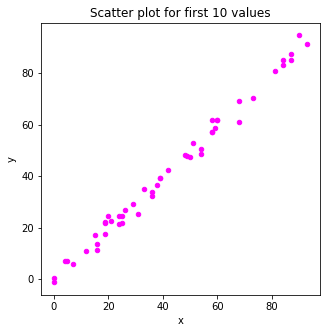

In [21]:
a.plot(x = 'x', y = 'y', kind = 'scatter',figsize = (5,5), title = 'Scatter plot for first 10 values',color = 'magenta')

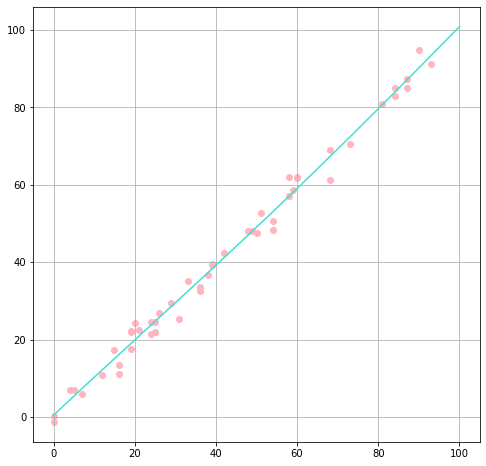

In [22]:
x = np.array(a['x'])
y = np.array(a['y'])

mymodel = np.poly1d(np.polyfit(x, y, 4))

myline = np.linspace(0, 100)
plt.figure(figsize = (8,8))
plt.scatter(x, y,color = 'lightpink')
plt.grid(which = 'major')
plt.plot(myline, mymodel(myline),color = 'turquoise',linewidth = 1.5)
plt.show()

In [23]:
X = np.array(df['x']).reshape(-1,1)
y = np.array(df['y']).reshape(-1,1)

In [24]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

In [27]:
pipe=Pipeline(Input)
pipe.fit(X_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [28]:
poly_pred=pipe.predict(X_train)

In [29]:
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_train,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

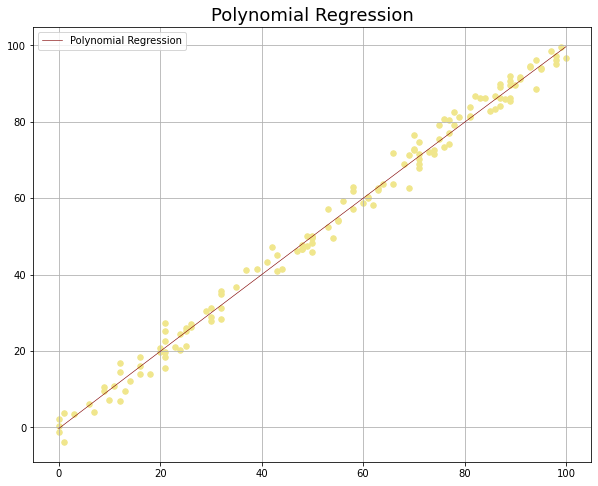

In [30]:
#plotting predictions
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,s=30,color = 'khaki')
plt.plot(x_poly,poly_pred,color='maroon',label='Polynomial Regression',linewidth = 0.6)
plt.title('Polynomial Regression', fontsize = 18)
plt.grid(which = 'major')
plt.legend()
plt.show()

In [31]:
metrics.mean_absolute_error(y_test, y_pred)

34.428216625100774

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

41.42751510584258

In [33]:
 metrics.mean_squared_error(y_test, y_pred)

1716.2390078448152

<h2>Ridge Regression

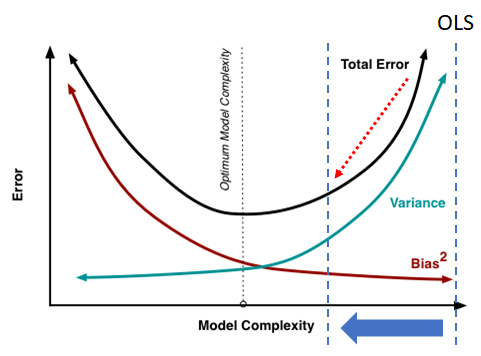

In [34]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

In [35]:
ridgeRegr = RidgeCV(alphas=(1e-15,1e-10,1e-5,1e-2,0.1, 1.0, 5,10,20,30,40,50,60,70,80,90,100),normalize=True)
ridgeRegr.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-05, 1.e-02, 1.e-01, 1.e+00, 5.e+00, 1.e+01,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       1.e+02]),
        normalize=True)

In [36]:
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

1532.1245617600382


In [37]:
ridgeRegr.score(ridgeRegr.predict(x_train),y_train)

0.9909207444052157

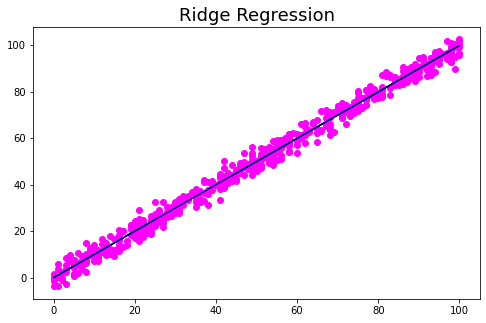

In [38]:
plt.figure(figsize = (8,5))
plt.scatter(x_train,y_train,color="magenta")
plt.plot(x_train,ridgeRegr.predict(x_train),color="navy")
plt.title("Ridge Regression", fontsize = 18)
plt.show()

In [39]:
metrics.mean_absolute_error(y_test, y_pred)

32.318262133342195

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

39.14236275137256

In [41]:
 metrics.mean_squared_error(y_test, y_pred)

1532.1245617600382